In [3]:
import numpy as np
np.load('./test_data/features/angry.npy').shape

(1, 64, 197)

In [4]:
np.load('./\data/features/000c986a6ebfaba80c7a544066b48373.npy').shape

(1, 64, 351)

In [5]:
from pathlib import Path
features_folder = 'test_data'
test_samples = [np.load(x) for x in (Path(features_folder)/'features').glob('*')]
test_samples[0][None,:].shape

(1, 1, 64, 197)

In [2]:
from core.dataset import load_tensor
load_tensor('test_data/features/angry.npy')

ValueError: cannot reshape array of size 12640 into shape (64)

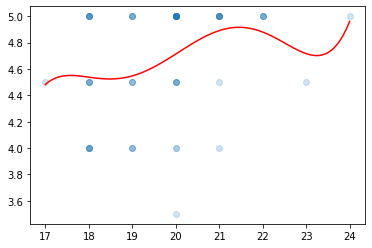

{'alpha': 1.0, 'fit_intercept': True, 'max_iter': 100, 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


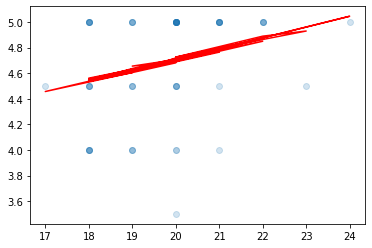

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 100,
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 26 21:31:37 2023

@author: lucretia
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels
from sklearn import linear_model,pipeline
# Квантильная регрессия
def quantile_regression(x, y, q=0.5):
    model = QuantileRegressor(quantile=q)
    res = model.fit(x, y)
    print(res.get_params())
    plt.scatter(x.iloc[:, 0], y, alpha=.2)
    plt.plot(x.iloc[:, 0], res.predict(x), color='r')
    plt.show()
    return res.get_params()

# Пуассоновская регрессия
def poisson_regression(x,y):
    model = linear_model.PoissonRegressor()
    res = model.fit(x, y)
    print(res.get_params())
    plt.scatter(x.iloc[:, 0], y, alpha=.2)
    plt.plot(x.iloc[:, 0], res.predict(x), color='r')
    plt.show()
    return res.get_params()

# Регрессия Хубера
def huber_regression(x, y):
    model = linear_model.HuberRegressor()
    res = model.fit(x, y)
    print('Score: {:.2f}'.format(res.score(x, y)))
    plt.scatter(x.iloc[:, 0], y, alpha=.2)
    plt.plot(x.iloc[:, 0], model.predict(x), color='r')
    plt.show()
    return model.coef_, model.intercept_

# Локальная регрессия (KernelReg)
def kernel_regression(x,y):
    kr = statsmodels.nonparametric.kernel_regression.KernelReg(y, x, var_type='c'*x.shape[1], reg_type='lc', bw='cv_ls')
    y_pred, _ = kr.fit(x)
    print('R²: {:.2f}'.format(kr.r_squared()))
    plt.scatter(x.iloc[:, 0], y, alpha=.2)
    plt.plot(x.iloc[:, 0], y_pred, color='r')
    plt.show()
    return kr.r_squared()

# Регрессия сплайнами
def spline_regression(x,y):
    x_plot = np.linspace(x.iloc[:, 0].min(), x.iloc[:, 0].max(), 100)
    linmodel = linear_model.LinearRegression()
    model = pipeline.make_pipeline(sklearn.preprocessing.PolynomialFeatures(5), linmodel)
    model.fit(x.iloc[:, 0].values.reshape(-1, 1), y)
    y_plot = model.predict(x_plot.reshape(-1, 1))
    plt.scatter(x.iloc[:, 0], y, alpha=.2)
    plt.plot(x_plot, y_plot, color='r')
    plt.show()
    return model.named_steps['linearregression'].coef_, model.named_steps['linearregression'].intercept_


# Чтение данных из csv-файла
data = pd.read_csv('D:\\telegram downloads\\fki_res.csv')

x = data[['age', 'erudition']]
y = data['gpa']

spline_regression(x,y)
poisson_regression(x,y)

In [7]:
data

,Отметка времени,name,age,course,sex,city,gpa,read_scale,avocado,erudition,...,auidio_fic,audio_nonfic,freetime_scale,foreign_languages,eng_level,pages_foreign,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,07.03.2023 17:36:05,Бочков Иван Сергеевич,20,3,1,Новоуральск,4.5,5,NaN,4,...,0,0,NaN,0,В2,50,NaN,NaN,50.0,"4,50"
1,07.03.2023 17:40:34,Тучина Елизавета Денисовна,20,3,0,Москва,4.5,7,NaN,7,...,0,0,NaN,1,английский с1)))),100,NaN,NaN,1000.0,"4,50"
2,07.03.2023 18:03:02,Гончарова Варвара Анатольевна,18,1,0,"Мытищи, Московская область",4.0,10,NaN,7,...,0,0,NaN,1,Английский — B2,50,NaN,NaN,2500.0,"4,00"
3,07.03.2023 18:11:53,Аноним,20,3,0,Москва,4.0,7,NaN,6,...,0,0,NaN,1,NaN,100,NaN,NaN,2000.0,"4,00"
4,07.03.2023 18:12:33,Денис Красильников,21,4,1,Московская,5.0,4,NaN,5,...,30,0,NaN,1,Английский C1,200,NaN,NaN,700.0,"5,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,09.03.2023 10:31:20,NaN,20,3,1,Иваново,5.0,7,5.0,6,...,30,10,3.0,1,Английский С1,200,NaN,NaN,NaN,NaN
57,23.03.2023 12:21:03,Удальцова Ксения,20,2,0,Москва,5.0,6,8.0,4,...,0,0,4.0,2,"Английский С1, Немецкий В2, Французский В1",800,NaN,NaN,NaN,NaN
58,23.03.2023 13:00:09,Беляков Никита Викторович,22,5,1,Москва,5.0,8,8.0,7,...,0,0,3.0,1,Английский с1,1000,NaN,NaN,NaN,NaN
59,23.03.2023 13:24:35,NaN,18,1,1,Москва,4.0,8,7.0,8,...,10,10,3.0,2,Английский C1\nФранцузский B1-B2\nНемецкий А1-А2,100,NaN,NaN,NaN,NaN
